In [1]:
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
from simulator_myokit import Simulator
sys.path.append('../../')
import plot_cell

In [2]:
sys.path.append('../Protocols')
from protocols import leak_staircase
'''
Kylie 2017 IKr
'''
model_path = "../mmt-model-files/kylie-2017-IKr.mmt" 

start_time = time.time()

simulator = Simulator(model_path, leak_staircase, pre_sim=2) 
simulator.name = "Kylie 2017 IKr"
dt = 0.002
times = np.arange(0, 15.4+dt, dt)
print(times.min(), times.max(), times.shape)

sim_params = {
    'ikr.g' : 3.05762986e+03,         # 'Endocardial' : 0,    'Epicardial' : 1,    'Mid-myocardial' : 2,
    'ikr.p1' : 1.12956276e-01,
    'ikr.p2' : 8.40568507e+01,
    'ikr.p3' : 3.88104629e-01,
    'ikr.p4' : 2.77827575e+01,
    'ikr.p5' : 1.51148201e+00,
    'ikr.p6' : 8.67120219e+01,
    'ikr.p7' : 8.27551811e+01,
    'ikr.p8' : 4.53615892e+01
} 
simulator.set_simulation_params(sim_params)
# simulator.pacing_constant_pre_simulate(-80e-3)
d = simulator.simulate(times, extra_log=['ikr.IKr', 'ikr.open', 'ikr.active'])    
population_by_continent = {
    'O': d['ikr.open']*d['ikr.active'],
    'I': d['ikr.open']*(1-d['ikr.active']),
    'C': (1-d['ikr.open'])*d['ikr.active'],
    'IC': (1-d['ikr.open'])*(1-d['ikr.active']),    
}

print("--- %s seconds ---"%(time.time()-start_time))

0.0 15.4 (7701,)
--- 12.29263973236084 seconds ---


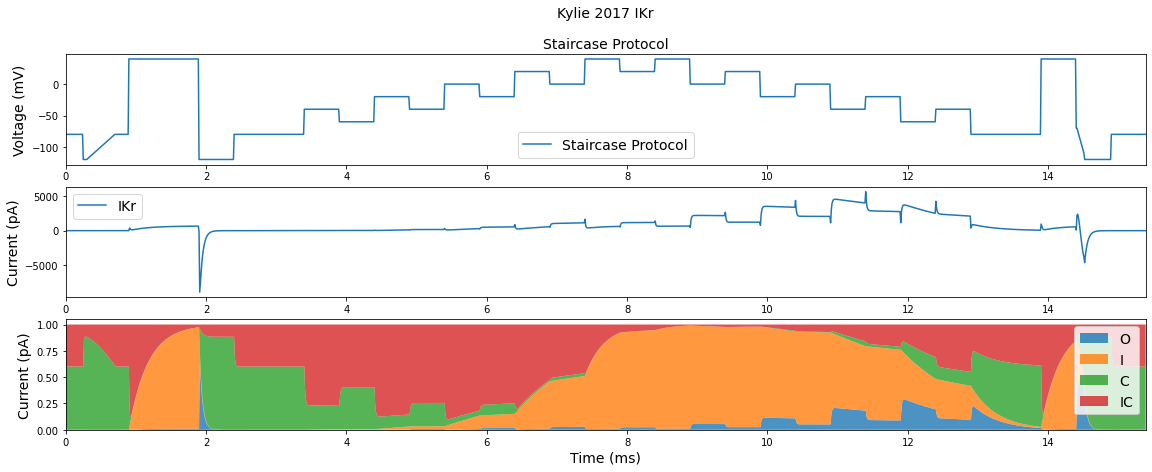

Complete


In [17]:
fig, axes = plt.subplots(3, figsize=(15, 6))
fig.suptitle(simulator.name, fontsize=14)
axes[0].set_title("Staircase Protocol", fontsize=14)
axes[0].set_xlim(0, d['engine.time'][-1])
axes[0].set_ylabel("Voltage (mV)", fontsize=14)
axes[0].plot(d['engine.time'], d['membrane.V']*1000, label="Staircase Protocol")
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(Gs[0], Gs[1], Gs[2], Gs[3], Gs[4], Gs[5], Gs[6], Gs[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# axes[0].text(0.67, 0.60, textstr, transform=axs[0].transAxes, fontsize=14, verticalalignment='top', bbox=props)    
axes[0].legend(fontsize=14)
axes[0].xaxis.set_visible(True)

axes[1].set_xlim(0, d['engine.time'][-1])
axes[1].set_ylabel("Current (pA)", fontsize=14)
axes[1].plot(d['engine.time'], d['ikr.IKr'], label="IKr")
axes[1].legend(fontsize=14)
axes[1].xaxis.set_visible(True)

axes[2].set_xlim(0, d['engine.time'][-1])
axes[2].set_xlabel("Time (ms)", fontsize=14)
axes[2].set_ylabel("Current (pA)", fontsize=14)
axes[2].stackplot(d['engine.time'], population_by_continent.values(), labels=population_by_continent.keys(), alpha=0.8)
axes[2].legend(fontsize=14)
axes[2].xaxis.set_visible(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.87, wspace=0.5, hspace=0.2)
# fig.tight_layout()#rect=[0.5, 0.5, 0.5, 0.5]
plt.show()
fig.savefig(os.path.join('Results', 'Kylie2017IKr-StaircaseVC'), dpi=100)
print("Complete")

--- 13.13748025894165 seconds ---


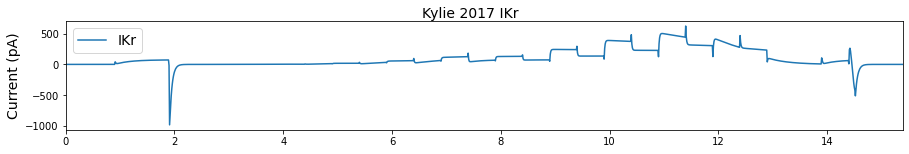

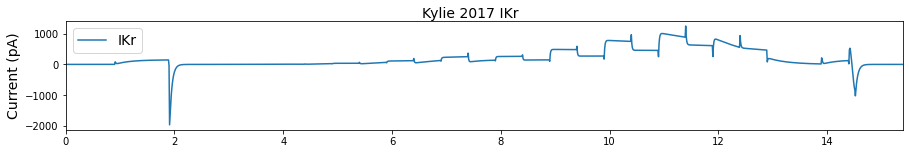

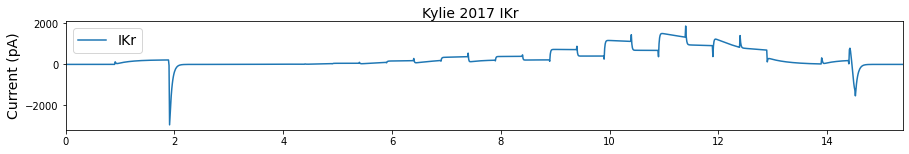

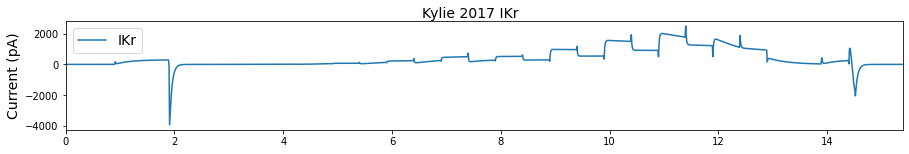

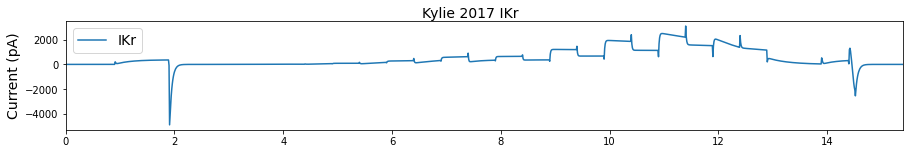

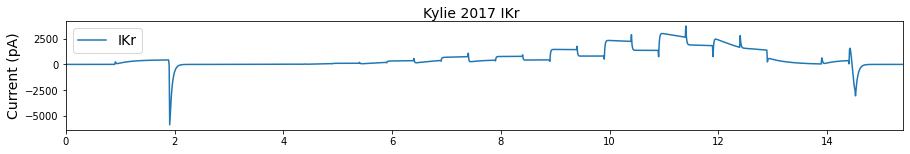

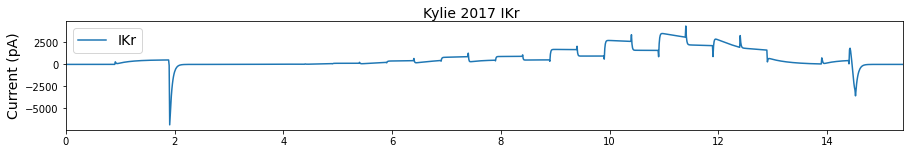

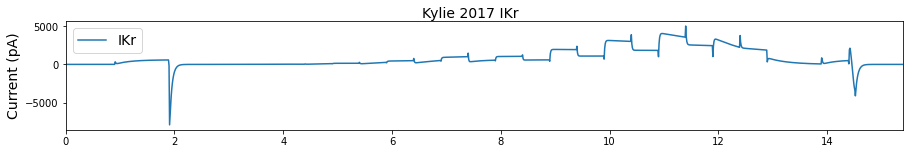

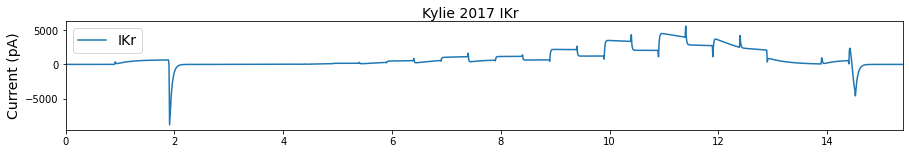

In [16]:
sys.path.append('../Protocols')
from protocols import leak_staircase
'''
Kylie 2017 IKr
'''
model_path = "../mmt-model-files/kylie-2017-IKr.mmt" 
start_time = time.time()
simulator = Simulator(model_path, leak_staircase, pre_sim=2) 
simulator.name = "Kylie 2017 IKr"
dt = 0.01
times = np.arange(0, 15.4+dt, dt)

# simulator.pacing_constant_pre_simulate(-80e-3)

for i in np.arange(0.1, 1, 0.1):
    sim_params = {
        'ikr.g': 500000*i,         # 'Endocardial' : 0,    'Epicardial' : 1,    'Mid-myocardial' : 2,
#         'ikr.p1' : 10*i,
#         'ikr.p2' : 100*i,
#         'ikr.p3' : 1,
#         'ikr.p4' : 1,
#         'ikr.p5' : 1,
#         'ikr.p6' : 1,
#         'ikr.p7' : 1,
#         'ikr.p8' : 1    
    } 
    simulator.set_simulation_params(sim_params)
    d = simulator.simulate(times, extra_log=['ikr.IKr', 'ikr.open', 'ikr.active'])    
    population_by_continent = {
        'O': d['ikr.open']*d['ikr.active'],
        'I': d['ikr.open']*(1-d['ikr.active']),
        'C': (1-d['ikr.open'])*d['ikr.active'],
        'IC': (1-d['ikr.open'])*(1-d['ikr.active']),    
    }
    
    fig, ax = plt.subplots(1, figsize=(15, 2))
    fig.suptitle(simulator.name, fontsize=14)    
    ax.set_xlim(0, d['engine.time'][-1])
    ax.set_ylabel("Current (pA)", fontsize=14)
    ax.plot(d['engine.time'], d['ikr.IKr'], label="IKr")
    # textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(Gs[0], Gs[1], Gs[2], Gs[3], Gs[4], Gs[5], Gs[6], Gs[7])
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # axes[0].text(0.67, 0.60, textstr, transform=axs[0].transAxes, fontsize=14, verticalalignment='top', bbox=props)    
    ax.legend(fontsize=14)
    ax.xaxis.set_visible(True)    
    
print("--- %s seconds ---"%(time.time()-start_time))
print("Complete")